# Imports

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
from PIL import Image, ImageOps
import tensorflow as tf
import tensorflow_datasets as tfds
import glob
import pathlib
from google.colab import files
from google.colab import drive
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from keras.layers import Dropout, Dense, Flatten
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle as pkl
from IPython.display import clear_output
from time import sleep
import sys
import requests
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import warnings
import pickle
import gc
from statistics import median
from IPython.display import display, Javascript, clear_output
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
print(tf.__version__)

2.5.0


In [ ]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/Capstone/anime/animated2"

cartoon_anger	   ck			   README.txt
cartoon_disgust    CK+48		   ResizedModelSingleEpoch.h5
cartoon_fear	   demo_model_combined.h5  Saved_Data
cartoon_joy	   demo_model.h5	   shinkai
cartoon_neutral    FullModel.h5		   tenthModel.h5
cartoon_sadness    imageset.npz		   testimages.npz
cartoon_surprise   labelset.npz		   Testing
cartoon_test.csv   MiniModel.h5		   trainer
cartoon_train.csv  predictor_model


In [ ]:
output_dir = "/content/cg/output_images"
input_dir = "/content/cg/input_images"

# Anger DataFrame

In [ ]:
anger = glob.glob('/content/drive/MyDrive/Capstone/anime/animated2/cartoon_anger/*.png')
anger_names = [str(i)[::-1].split("/", 1)[0][::-1] for i in anger]
anger_directories = [str(i)[::-1].split("/", 1)[1][::-1] for i in anger]
cartoon_anger = pd.DataFrame()
cartoon_anger["Directories"], cartoon_anger["Names"], cartoon_anger["Emotion"], cartoon_anger["Y"] = anger_directories, anger_names, "anger", 0   

In [ ]:
cartoon_anger

,Directories,Names,Emotion,Y
0,/content/drive/MyDrive/Capstone/anime/animated...,ray_anger_1417.png,anger,0
1,/content/drive/MyDrive/Capstone/anime/animated...,ray_anger_1433.png,anger,0
2,/content/drive/MyDrive/Capstone/anime/animated...,ray_anger_1422.png,anger,0
3,/content/drive/MyDrive/Capstone/anime/animated...,ray_anger_1403.png,anger,0
4,/content/drive/MyDrive/Capstone/anime/animated...,ray_anger_1407.png,anger,0
...,...,...,...,...
9173,/content/drive/MyDrive/Capstone/anime/animated...,aia_anger_1153.png,anger,0
9174,/content/drive/MyDrive/Capstone/anime/animated...,aia_anger_1151.png,anger,0
9175,/content/drive/MyDrive/Capstone/anime/animated...,aia_anger_1159.png,anger,0
9176,/content/drive/MyDrive/Capstone/anime/animated...,aia_anger_1164.png,anger,0


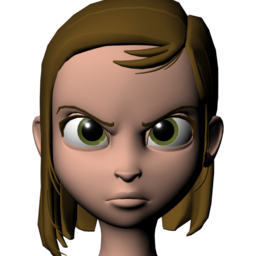

In [ ]:
path = "/content/drive/MyDrive/Capstone/anime/animated2/cartoon_anger/aia_anger_1.png"
Image.open(path)

# Joy DataFrame

In [ ]:
joy = glob.glob('/content/drive/MyDrive/Capstone/anime/animated2/cartoon_joy/*.png')
joy_names = [str(i)[::-1].split("/", 1)[0][::-1] for i in joy]
joy_directories = [str(i)[::-1].split("/", 1)[1][::-1] for i in joy]
cartoon_joy = pd.DataFrame()
cartoon_joy["Directories"], cartoon_joy["Names"], cartoon_joy["Emotion"], cartoon_joy["Y"] = joy_directories, joy_names, "joy", 1    

In [ ]:
cartoon_joy

,Directories,Names,Emotion,Y
0,/content/drive/MyDrive/Capstone/anime/animated...,ray_joy_11.png,joy,1
1,/content/drive/MyDrive/Capstone/anime/animated...,ray_joy_117.png,joy,1
2,/content/drive/MyDrive/Capstone/anime/animated...,ray_joy_116.png,joy,1
3,/content/drive/MyDrive/Capstone/anime/animated...,ray_joy_1109.png,joy,1
4,/content/drive/MyDrive/Capstone/anime/animated...,ray_joy_118.png,joy,1
...,...,...,...,...
7333,/content/drive/MyDrive/Capstone/anime/animated...,aia_joy_209.png,joy,1
7334,/content/drive/MyDrive/Capstone/anime/animated...,aia_joy_191.png,joy,1
7335,/content/drive/MyDrive/Capstone/anime/animated...,aia_joy_20.png,joy,1
7336,/content/drive/MyDrive/Capstone/anime/animated...,aia_joy_189.png,joy,1


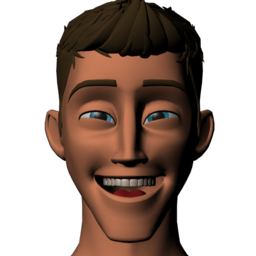

In [ ]:
Image.open("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_joy/jules_joy_1.png")

# Surprise DataFrame

In [ ]:
surprise = glob.glob('/content/drive/MyDrive/Capstone/anime/animated2/cartoon_surprise/*.png')
surprise_names = [str(i)[::-1].split("/", 1)[0][::-1] for i in surprise]
surprise_directories = [str(i)[::-1].split("/", 1)[1][::-1] for i in surprise]
cartoon_surprise = pd.DataFrame()
cartoon_surprise["Directories"], cartoon_surprise["Names"], cartoon_surprise["Emotion"], cartoon_surprise["Y"] = surprise_directories, surprise_names, "surprise", 2      

In [ ]:
cartoon_surprise

,Directories,Names,Emotion,Y
0,/content/drive/MyDrive/Capstone/anime/animated...,ray_surprise_1179.png,surprise,2
1,/content/drive/MyDrive/Capstone/anime/animated...,ray_surprise_1185.png,surprise,2
2,/content/drive/MyDrive/Capstone/anime/animated...,ray_surprise_1194.png,surprise,2
3,/content/drive/MyDrive/Capstone/anime/animated...,ray_surprise_1184.png,surprise,2
4,/content/drive/MyDrive/Capstone/anime/animated...,ray_surprise_12.png,surprise,2
...,...,...,...,...
8730,/content/drive/MyDrive/Capstone/anime/animated...,aia_surprise_1661.png,surprise,2
8731,/content/drive/MyDrive/Capstone/anime/animated...,aia_surprise_1657.png,surprise,2
8732,/content/drive/MyDrive/Capstone/anime/animated...,aia_surprise_1664.png,surprise,2
8733,/content/drive/MyDrive/Capstone/anime/animated...,aia_surprise_1671.png,surprise,2


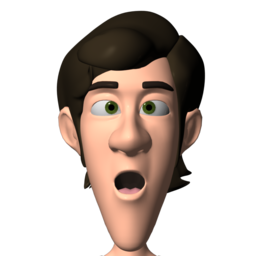

In [ ]:
Image.open("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_surprise/malcolm_surprise_1.png")

# Disgust DataFrame

In [ ]:
disgust = glob.glob('/content/drive/MyDrive/Capstone/anime/animated2/cartoon_disgust/*.png')
disgust_names = [str(i)[::-1].split("/", 1)[0][::-1] for i in disgust]
disgust_directories = [str(i)[::-1].split("/", 1)[1][::-1] for i in disgust]
cartoon_disgust = pd.DataFrame()
cartoon_disgust["Directories"], cartoon_disgust["Names"], cartoon_disgust["Emotion"], cartoon_disgust["Y"] = disgust_directories, disgust_names, "disgust", 3  

In [ ]:
cartoon_disgust

,Directories,Names,Emotion,Y
0,/content/drive/MyDrive/Capstone/anime/animated...,ray_disgust_142.png,disgust,3
1,/content/drive/MyDrive/Capstone/anime/animated...,ray_disgust_1441.png,disgust,3
2,/content/drive/MyDrive/Capstone/anime/animated...,ray_disgust_1416.png,disgust,3
3,/content/drive/MyDrive/Capstone/anime/animated...,ray_disgust_1428.png,disgust,3
4,/content/drive/MyDrive/Capstone/anime/animated...,ray_disgust_1439.png,disgust,3
...,...,...,...,...
8580,/content/drive/MyDrive/Capstone/anime/animated...,aia_disgust_1510.png,disgust,3
8581,/content/drive/MyDrive/Capstone/anime/animated...,aia_disgust_1546.png,disgust,3
8582,/content/drive/MyDrive/Capstone/anime/animated...,aia_disgust_1529.png,disgust,3
8583,/content/drive/MyDrive/Capstone/anime/animated...,aia_disgust_1536.png,disgust,3


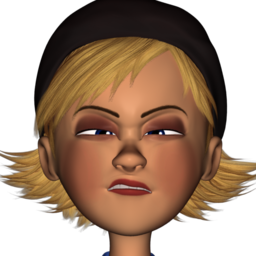

In [ ]:
Image.open("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_disgust/bonnie_disgust_1.png")

# Fear DataFrame

In [ ]:
fear = glob.glob('/content/drive/MyDrive/Capstone/anime/animated2/cartoon_fear/*.png')
fear_names= [str(i)[::-1].split("/", 1)[0][::-1] for i in fear]
fear_directories = [str(i)[::-1].split("/", 1)[1][::-1] for i in fear]
cartoon_fear = pd.DataFrame()
cartoon_fear["Directories"], cartoon_fear["Names"], cartoon_fear["Emotion"], cartoon_fear["Y"] = fear_directories, fear_names, "fear", 4    

In [ ]:
cartoon_fear

,Directories,Names,Emotion,Y
0,/content/drive/MyDrive/Capstone/anime/animated...,ray_fear_1102.png,fear,4
1,/content/drive/MyDrive/Capstone/anime/animated...,ray_fear_1123.png,fear,4
2,/content/drive/MyDrive/Capstone/anime/animated...,ray_fear_1127.png,fear,4
3,/content/drive/MyDrive/Capstone/anime/animated...,ray_fear_111.png,fear,4
4,/content/drive/MyDrive/Capstone/anime/animated...,ray_fear_1134.png,fear,4
...,...,...,...,...
7425,/content/drive/MyDrive/Capstone/anime/animated...,aia_fear_378.png,fear,4
7426,/content/drive/MyDrive/Capstone/anime/animated...,aia_fear_377.png,fear,4
7427,/content/drive/MyDrive/Capstone/anime/animated...,aia_fear_370.png,fear,4
7428,/content/drive/MyDrive/Capstone/anime/animated...,aia_fear_372.png,fear,4


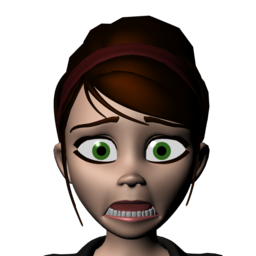

In [ ]:
Image.open("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_fear/mery_fear_1.png")

# Sadness DataFrame

In [ ]:
sadness = glob.glob('/content/drive/MyDrive/Capstone/anime/animated2/cartoon_sadness/*.png')
sadness_names = [str(i)[::-1].split("/", 1)[0][::-1] for i in sadness]
sadness_directories = [str(i)[::-1].split("/", 1)[1][::-1] for i in sadness]
cartoon_sadness = pd.DataFrame()
cartoon_sadness["Directories"], cartoon_sadness["Names"], cartoon_sadness["Emotion"], cartoon_sadness["Y"] = sadness_directories, sadness_names, "sadness", 5

In [ ]:
cartoon_sadness

,Directories,Names,Emotion,Y
0,/content/drive/MyDrive/Capstone/anime/animated...,ray_sadness_1095.png,sadness,5
1,/content/drive/MyDrive/Capstone/anime/animated...,ray_sadness_1093.png,sadness,5
2,/content/drive/MyDrive/Capstone/anime/animated...,ray_sadness_1083.png,sadness,5
3,/content/drive/MyDrive/Capstone/anime/animated...,ray_sadness_1084.png,sadness,5
4,/content/drive/MyDrive/Capstone/anime/animated...,ray_sadness_118.png,sadness,5
...,...,...,...,...
7631,/content/drive/MyDrive/Capstone/anime/animated...,aia_sadness_223.png,sadness,5
7632,/content/drive/MyDrive/Capstone/anime/animated...,aia_sadness_237.png,sadness,5
7633,/content/drive/MyDrive/Capstone/anime/animated...,aia_sadness_251.png,sadness,5
7634,/content/drive/MyDrive/Capstone/anime/animated...,aia_sadness_266.png,sadness,5


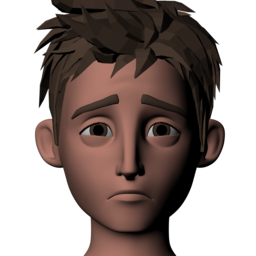

In [ ]:
Image.open("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_sadness/ray_sadness_1.png")

# Neutral DataFrame

In [ ]:
neutral = glob.glob('/content/drive/MyDrive/Capstone/anime/animated2/cartoon_neutral/*.png')
neutral_names = [str(i)[::-1].split("/", 1)[0][::-1] for i in neutral]
neutral_directories = [str(i)[::-1].split("/", 1)[1][::-1] for i in neutral]
cartoon_neutral = pd.DataFrame()
cartoon_neutral["Directories"], cartoon_neutral["Names"], cartoon_neutral["Emotion"], cartoon_neutral["Y"] = neutral_directories, neutral_names, "neutral", 6 

In [ ]:
cartoon_neutral

,Directories,Names,Emotion,Y
0,/content/drive/MyDrive/Capstone/anime/animated...,ray_neutral_1119.png,neutral,6
1,/content/drive/MyDrive/Capstone/anime/animated...,ray_neutral_1096.png,neutral,6
2,/content/drive/MyDrive/Capstone/anime/animated...,ray_neutral_110.png,neutral,6
3,/content/drive/MyDrive/Capstone/anime/animated...,ray_neutral_1103.png,neutral,6
4,/content/drive/MyDrive/Capstone/anime/animated...,ray_neutral_1093.png,neutral,6
...,...,...,...,...
6945,/content/drive/MyDrive/Capstone/anime/animated...,aia_neutral_762.png,neutral,6
6946,/content/drive/MyDrive/Capstone/anime/animated...,aia_neutral_771.png,neutral,6
6947,/content/drive/MyDrive/Capstone/anime/animated...,aia_neutral_759.png,neutral,6
6948,/content/drive/MyDrive/Capstone/anime/animated...,aia_neutral_775.png,neutral,6


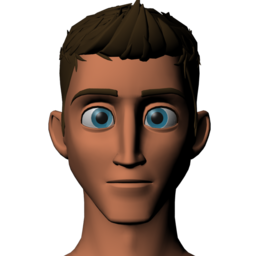

In [ ]:
Image.open("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_neutral/jules_neutral_1.png")

# Concatenating all dataframes -> Cartoon DataFrame

In [ ]:
# cartoon = pd.concat([cartoon_anger, cartoon_joy, cartoon_surprise, cartoon_disgust, cartoon_fear, cartoon_sadness, cartoon_neutral])

In [ ]:
cartoon

In [ ]:
#Train test split
cartoon_train, cartoon_test = train_test_split(cartoon, stratify=cartoon["Y"], test_size = 0.2)

In [ ]:
cartoon_train

# Loading Saved DataFrames

In [ ]:
# cartoon_train.to_csv("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_train.csv")
# cartoon_test.to_csv("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_test.csv")

In [ ]:
cartoon_train = pd.read_csv("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_train.csv")
cartoon_test = pd.read_csv("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_test.csv")

In [ ]:
cartoon_train["Y"].value_counts()

0    7342
2    6988
3    6868
5    6109
4    5944
1    5870
6    5560
Name: Y, dtype: int64

In [ ]:
df = cartoon_train.sample(frac = 1)
df = df.reset_index()
df

,index,Unnamed: 0,Directories,Names,Emotion,Y
0,13643,5856,/content/drive/MyDrive/Capstone/anime/animated...,bonnie_neutral_398.png,neutral,6
1,32486,1850,/content/drive/MyDrive/Capstone/anime/animated...,mery_neutral_92.png,neutral,6
2,42783,7301,/content/drive/MyDrive/Capstone/anime/animated...,aia_fear_255.png,fear,4
3,23929,5520,/content/drive/MyDrive/Capstone/anime/animated...,bonnie_disgust_479.png,disgust,3
4,39977,2041,/content/drive/MyDrive/Capstone/anime/animated...,malcolm_neutral_20.png,neutral,6
...,...,...,...,...,...,...
44676,19938,5843,/content/drive/MyDrive/Capstone/anime/animated...,bonnie_joy_564.png,joy,1
44677,24587,616,/content/drive/MyDrive/Capstone/anime/animated...,ray_sadness_661.png,sadness,5
44678,7529,2362,/content/drive/MyDrive/Capstone/anime/animated...,malcolm_disgust_766.png,disgust,3
44679,23143,6436,/content/drive/MyDrive/Capstone/anime/animated...,aia_fear_763.png,fear,4


# Model Configuration and Training

In [ ]:
def get_models():
  model_bottleneck = VGG16(weights='imagenet', include_top=False)
  model_cartoon = load_model("/content/drive/MyDrive/Capstone/anime/animated2/ResizedModelSingleEpoch.h5")
  model_cartoon.compile(loss='categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
  
  return model_bottleneck, model_cartoon

In [ ]:
model_bottleneck = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
model_bottleneck.build(input_shape = (None, 256, 256, 3))

In [ ]:
model_bottleneck.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
# Transfer learning -> Using pretrained VGG with imagenet weights. Fine tuning to be done with cartoon images

In [ ]:
batch_size = 20 # Stream and train batches of 20 images at once. Cannot load entire dataset into limited RAM
ishape = 8*8*512 # Shape of VGG output

In [ ]:
# Train model for 1 epoch. Time taken ~ 3 hours

In [ ]:
modelvgg = Sequential()
modelvgg.add(Flatten())
modelvgg.add(Dense(512, activation='relu', input_shape = (ishape, )))
modelvgg.add(Dropout(0.2))
modelvgg.add(Dense(256, activation='relu'))
modelvgg.add(Dense(128, activation='relu'))
modelvgg.add(BatchNormalization())
modelvgg.add(Dense(64, activation='relu'))
modelvgg.add(Dense(7, activation='softmax'))
modelvgg.compile(loss='categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])

In [ ]:
modelvgg.build(input_shape = (None, 8, 8, 512))

In [ ]:
modelvgg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 32768)             0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 512)               16777728  
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 512)               0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 256)               131328    
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 128)               32896     
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 128)               512       
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 64)                8

In [ ]:
# Cartoon-model pre-training done as follows:

for i in range(int(len(df)/batch_size)):
  try:
    print("Training on batch " +str(i+1))
    temp_df = df[i*batch_size:(i+1)*batch_size]
    images, labels = get_cartoon_images_and_labels(temp_df)
    images = convert_cartoon_grayscale(resize_cartoon_images(images))
    predictions = model.predict(images)
    modelvgg.train_on_batch(np.asarray(predictions), labels)
    del images
    del labels
    del temp_df
  except:
    print("Error on batch " + str(i+1))

In [ ]:
# Accuracy here is 100%, but our end goal is to obtain a better accuracy on human images.
# modelvgg.save("/content/drive/MyDrive/Capstone/anime/animated2/ResizedModelSingleEpoch.h5")
# Load saved model from drive and test accuracy = 100%

# Image preprocessing

In [ ]:
def get_human_paths():
  human_anger_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/CK+48/anger/*.png")
  df0 = pd.DataFrame({'Path':human_anger_paths, 'Label':[0 for i in human_anger_paths]})
  human_disgust_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/CK+48/disgust/*.png")
  df3 = pd.DataFrame({'Path':human_disgust_paths, 'Label':[3 for i in human_disgust_paths]})
  human_fear_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/CK+48/fear/*.png")
  df4 = pd.DataFrame({'Path':human_fear_paths, 'Label':[4 for i in human_fear_paths]})
  human_sadness_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/CK+48/sadness/*.png")
  df5 = pd.DataFrame({'Path':human_sadness_paths, 'Label':[5 for i in human_sadness_paths]})
  human_joy_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/CK+48/happy/*.png")
  df1 = pd.DataFrame({'Path':human_joy_paths, 'Label':[1 for i in human_joy_paths]})
  human_surprise_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/CK+48/surprise/*.png")
  df2 = pd.DataFrame({'Path':human_surprise_paths, 'Label':[2 for i in human_surprise_paths]})
  human_paths = human_anger_paths + human_disgust_paths + human_fear_paths + human_joy_paths + human_sadness_paths + human_surprise_paths
  human_df = pd.concat([df0, df1, df2, df3, df4, df5]).reset_index()

  return human_paths, human_df

In [ ]:
def get_cartoon_images_and_labels(temp_df, integer_labels = False):
  paths = [i+"/"+j for i,j in zip(temp_df["Directories"].tolist(), temp_df["Names"].tolist())]
  images = np.asarray([np.asarray(Image.open(image))[:, :, :3] for image in paths])
  labels = np.asarray(temp_df["Y"].tolist())
  labels = to_categorical(labels, num_classes=7)
  integerLabels = np.asarray([np.argmax(label) for label in labels])

  if (integer_labels):
    return images, labels, integerLabels
  else:
    return images, labels

In [ ]:
def resize_cartoon_images(images):
  clipped_images = [image[40:240, 35:225] for image in images]
  resized_clipped_images = [cv2.resize(clipped_image, (256, 256)) for clipped_image in clipped_images]
  return np.asarray(resized_clipped_images)

In [ ]:
def convert_cartoon_grayscale(images):
  return np.asarray([np.asarray(ImageOps.grayscale(Image.fromarray(image)).convert("RGB")) for image in images])

In [ ]:
def display_images(images):
  for image in images:
    display(Image.fromarray(image))
    print()

In [ ]:
def get_human_cartoonized_images(human_ct_df, integer_labels = False, augment = False):
  paths = human_ct_df["Path"]
  if (augment):
    human_ct_images = np.concatenate((np.asarray([np.fliplr(np.asarray(ImageOps.grayscale(Image.open(path)).convert("RGB"))) for path in paths]), np.asarray([np.asarray(ImageOps.grayscale(Image.open(path)).convert("RGB")) for path in paths])), axis = 0)
    human_ct_labels = np.concatenate((np.asarray(human_ct_df["Label"].tolist()), np.asarray(human_ct_df["Label"].tolist())), axis = 0)
    human_ct_labels = np.asarray(to_categorical(human_ct_labels, num_classes=7))
  else:
    human_ct_images = np.asarray([np.asarray(ImageOps.grayscale(Image.open(path)).convert("RGB")) for path in paths])
    human_ct_labels = np.asarray(human_ct_df["Label"].tolist())
    human_ct_labels = np.asarray(to_categorical(human_ct_labels, num_classes=7))

  integerLabels = np.asarray([np.argmax(label) for label in human_ct_labels])

  if (integer_labels):
    return human_ct_images, human_ct_labels, integerLabels
  else:
    return human_ct_images, human_ct_labels

In [ ]:
def get_human_images(human_df, integer_labels = False):
  paths = human_df["Path"]
  human_images = np.asarray([cv2.resize(np.asarray(Image.open(path).convert("RGB")), (256, 256)) for path in paths])
  human_labels = np.asarray(human_df["Label"].tolist())
  human_labels = np.asarray(to_categorical(human_labels, num_classes=7))
  integerLabels = np.asarray([np.argmax(label) for label in human_labels])

  if (integer_labels):
    return human_images, human_labels, integerLabels
  else:
    return human_images, human_labels

In [ ]:
def train_human(model_bottleneck, model_cartoon, human_images, human_labels, epochs, lr = 0.1):
  human_bottleneck = np.asarray(model_bottleneck.predict(human_images))

  for epoch in range(epochs):
    #print("Training epoch " + str(epoch+1))
    for i in range(len(human_bottleneck)//20):
      model_cartoon.train_on_batch(human_bottleneck[20*i:20*(i+1)], human_labels[20*i:20*(i+1)])
  
  return model_cartoon

In [ ]:
def get_human_cartoonized_paths():
  human_anger_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/shinkai/0*.png")
  df0 = pd.DataFrame({'Path':human_anger_paths, 'Label':[0 for i in human_anger_paths]})
  human_disgust_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/shinkai/3*.png")
  df3 = pd.DataFrame({'Path':human_disgust_paths, 'Label':[3 for i in human_disgust_paths]})
  human_fear_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/shinkai/4*.png")
  df4 = pd.DataFrame({'Path':human_fear_paths, 'Label':[4 for i in human_fear_paths]})
  human_sadness_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/shinkai/5*.png")
  df5 = pd.DataFrame({'Path':human_sadness_paths, 'Label':[5 for i in human_sadness_paths]})
  human_joy_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/shinkai/1*.png")
  df1 = pd.DataFrame({'Path':human_joy_paths, 'Label':[1 for i in human_joy_paths]})
  human_surprise_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/shinkai/2*.png")
  df2 = pd.DataFrame({'Path':human_surprise_paths, 'Label':[2 for i in human_surprise_paths]})
  human_paths = human_anger_paths + human_disgust_paths + human_fear_paths + human_joy_paths + human_sadness_paths + human_surprise_paths
  human_df = pd.concat([df0, df1, df2, df3, df4, df5]).reset_index()

  return human_paths, human_df

# Accuracy Testing

In [ ]:
def test_cartoon_accuracy(model_bottleneck, model_test, temp_df, display_image = True):
  temp_df = temp_df.reset_index()
  images, labels = get_cartoon_images_and_labels(temp_df)
  images = convert_cartoon_grayscale(resize_cartoon_images(images))
  bottleneck_features = model_bottleneck.predict(images)
  predictions = model_test.predict_classes(bottleneck_features)
  probabilities = model_test.predict(bottleneck_features)

  key = {0:"anger", 1:"joy", 2:"surprise", 3:"disgust", 4:"fear", 5:"sadness", 6:"neutral"}
  integerLabels = np.asarray([np.argmax(label) for label in labels])

  for index, image in list(enumerate(images)):
    if(display_image):
      display(Image.fromarray(image))
      print()
      print(temp_df["Names"][index])
      print("Predicted Class: " + str(key[predictions[index]]))
      print("Confidence in Prediction: " + str(np.max(probabilities[index])))
      print("Actual Class: " + str(key[integerLabels[index]]))
      print("__________________________________________________\n")

  accuracy = accuracy_score(integerLabels, predictions)
  metrics = precision_recall_fscore_support(integerLabels, predictions, average='weighted')
  confusion = confusion_matrix(integerLabels, predictions)

  return predictions, probabilities, accuracy, metrics, confusion

In [ ]:
def test_human_accuracy(model_bottleneck, model_test, human_df, display_image = True):
  human_df = human_df.reset_index()
  human_images, human_labels = get_human_images(human_df)
  test_human_bottleneck =  np.asarray(model_bottleneck.predict(human_images))
  predictions = model_test.predict_classes(test_human_bottleneck)
  probabilities = model_test.predict(test_human_bottleneck)

  key = {0:"anger", 1:"joy", 2:"surprise", 3:"disgust", 4:"fear", 5:"sadness", 6:"neutral"}
  integerLabels = np.asarray([np.argmax(label) for label in human_labels])

  for index, image in list(enumerate(human_images)):
    if(display_image):
      display(Image.fromarray(image))
      print()
      print("Predicted Class: " + str(key[predictions[index]]))
      print("Confidence in Prediction: " + str(np.max(probabilities[index])))
      print("Actual Class: " + str(key[integerLabels[index]]))
      print("__________________________________________________\n")

  accuracy = accuracy_score(integerLabels, predictions)
  metrics = precision_recall_fscore_support(integerLabels, predictions, average='weighted')
  confusion = confusion_matrix(integerLabels, predictions)

  return predictions, probabilities, accuracy, metrics, confusion

In [ ]:
def test_human_cartoonized_accuracy(model_bottleneck, model_test, human_ct_df, display_image = True, augment = False):
  human_ct_df = human_ct_df.reset_index()
  if (augment):
    human_ct_images, human_ct_labels = get_human_cartoonized_images(human_ct_df, augment = True)
  else:
    human_ct_images, human_ct_labels = get_human_cartoonized_images(human_ct_df)
  test_human_bottleneck =  np.asarray(model_bottleneck.predict(human_ct_images))
  predictions = model_test.predict_classes(test_human_bottleneck)
  probabilities = model_test.predict(test_human_bottleneck)

  key = {0:"anger", 1:"joy", 2:"surprise", 3:"disgust", 4:"fear", 5:"sadness", 6:"neutral"}
  integerLabels = np.asarray([np.argmax(label) for label in human_ct_labels])

  for index, image in list(enumerate(human_ct_images)):
    if(display_image):
      display(Image.fromarray(image))
      print()
      print("Predicted Class: " + str(key[predictions[index]]))
      print("Confidence in Prediction: " + str(np.max(probabilities[index])))
      print("Actual Class: " + str(key[integerLabels[index]]))
      print("__________________________________________________\n")

  accuracy = accuracy_score(integerLabels, predictions)
  metrics = precision_recall_fscore_support(integerLabels, predictions, average='weighted')
  confusion = confusion_matrix(integerLabels, predictions)

  return predictions, probabilities, accuracy, metrics, confusion

# Data Collection

In [ ]:
human_ct_paths, human_ct_df = get_human_cartoonized_paths()

In [ ]:
class Data:
  percentage = -1
  epoch = -1
  fold_count = -1
  test_predictions = -1
  test_probabilities = -1
  test_accuracy = -1
  test_metrics = -1
  test_confusion = -1
  train_predictions = -1
  train_probabilities = -1
  train_accuracy = -1
  train_metrics = -1
  train_confusion = -1

In [ ]:
def train_kfold(human_ct_df, epochs, percentages):
  data_list = []
  for percentage in percentages:
    if (percentage!=100):
      trainer, tester = train_test_split(human_ct_df, stratify = human_ct_df["Label"], test_size = 1-percentage/100)
    else:
      trainer = human_ct_df
      tester = pd.DataFrame(columns = human_ct_df.columns)
    
    skfold = StratifiedKFold(n_splits = 10, shuffle = (percentage == 100))
    human_images_ct, human_labels_ct, human_labels_ct_integers = get_human_cartoonized_images(trainer, integer_labels = True)
    fold_count = 0

    for train_index, test_index in skfold.split(human_images_ct, human_labels_ct_integers):
      train_images, test_images = human_images_ct[train_index], human_images_ct[test_index]
      train_labels, test_labels = human_labels_ct[train_index], human_labels_ct[test_index]
      model_bottleneck, model_cartoon = get_models()

      for epoch in range(epochs):
        print("Training Percentage: " + str(percentage) + " | Fold: " + str(fold_count) + " | Epoch :" + str(epoch))
        data_obj = Data()
        model_cartoon = train_human(model_bottleneck, model_cartoon, train_images, train_labels, epochs = 1)
        test_predictions, test_probabilities, test_accuracy, test_metrics, test_confusion = test_human_cartoonized_accuracy(model_bottleneck, model_cartoon, pd.concat([trainer.iloc[test_index], tester]), display_image = False)
        train_predictions, train_probabilities, train_accuracy, train_metrics, train_confusion = test_human_cartoonized_accuracy(model_bottleneck, model_cartoon, trainer.iloc[train_index], display_image = False)
        data_obj.percentage = percentage
        data_obj.epoch = epoch
        data_obj.fold_count = fold_count
        data_obj.test_predictions = test_predictions
        data_obj.test_probabilities = test_probabilities
        data_obj.test_accuracy = test_accuracy
        data_obj.test_metrics = test_metrics
        data_obj.test_confusion = test_confusion
        data_obj.train_predictions = train_predictions
        data_obj.train_probabilities = train_probabilities
        data_obj.train_accuracy = train_accuracy
        data_obj.train_metrics = train_metrics
        data_obj.train_confusion = train_confusion

        data_list.append(data_obj)

        collected = gc.collect()

      fold_count+=1

  return data_list

In [ ]:
def train_kfold_augmented(human_ct_df, epochs, percentages):
  data_list = []
  for percentage in percentages:
    if (percentage!=100):
      trainer, tester = train_test_split(human_ct_df, stratify = human_ct_df["Label"], test_size = 1-percentage/100)
      print("not 100")
    else:
      trainer = human_ct_df.sample(frac = 1).reset_index(drop = True)
      tester = pd.DataFrame(columns = human_ct_df.columns)
      print("100")
    print(percentage==100)
    skfold = StratifiedKFold(n_splits = 10, shuffle = (percentage == 100))

    fold_count = 0

    for train_index, test_index in skfold.split(trainer, trainer["Label"]):
      train_images, train_labels = get_human_cartoonized_images(trainer.iloc[train_index], augment = True)
      test_images, test_labels = get_human_cartoonized_images(trainer.iloc[test_index], augment = True)
      model_bottleneck, model_cartoon = get_models()

      for epoch in range(epochs):
        print("Training Percentage: " + str(percentage) + " | Fold: " + str(fold_count) + " | Epoch: " + str(epoch))
        data_obj = Data()
        model_cartoon = train_human(model_bottleneck, model_cartoon, train_images, train_labels, epochs = 1)
        test_predictions, test_probabilities, test_accuracy, test_metrics, test_confusion = test_human_cartoonized_accuracy(model_bottleneck, model_cartoon, pd.concat([trainer.iloc[test_index], tester]), display_image = False, augment = True)
        train_predictions, train_probabilities, train_accuracy, train_metrics, train_confusion = test_human_cartoonized_accuracy(model_bottleneck, model_cartoon, trainer.iloc[train_index], display_image = False, augment = True)
        
        data_obj.percentage = percentage
        data_obj.epoch = epoch
        data_obj.fold_count = fold_count
        data_obj.test_predictions = test_predictions
        data_obj.test_probabilities = test_probabilities
        data_obj.test_accuracy = test_accuracy
        data_obj.test_metrics = test_metrics
        data_obj.test_confusion = test_confusion
        data_obj.train_predictions = train_predictions
        data_obj.train_probabilities = train_probabilities
        data_obj.train_accuracy = train_accuracy
        data_obj.train_metrics = train_metrics
        data_obj.train_confusion = train_confusion

        print(test_accuracy)
        print(train_accuracy)

        data_list.append(data_obj)

        collected = gc.collect()

      fold_count+=1
      

  return data_list

In [ ]:
# for i in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
#   data_augmented = train_kfold(human_ct_df, epochs = 10, percentages=[i])
#   file_name = "/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/data_unaugmented_new" + str(i) + ".pkl"
#   open_file = open(file_name, "wb")
#   pickle.dump(data_augmented, open_file)
#   open_file.close()

In [ ]:
file_name1 = "/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/data_augmented_final.pkl"
file_name2 = "/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/data_unaugmented_final.pkl"
file_name3 = "/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/data_unaugmented_newer.pkl"
file_name4 = "/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/data_augmented_newer.pkl"

with open(file_name1, 'rb') as f:
  data_augmented = pickle.load(f)
with open(file_name2, 'rb') as f:
  data_unaugmented = pickle.load(f)
with open(file_name3, 'rb') as f:
  data_unaugmented_newer = pickle.load(f)
with open(file_name4, 'rb') as f:
  data_augmented_newer = pickle.load(f)

data_augmented[900:1000] = data_augmented_newer
data_unaugmented[900:1000] = data_unaugmented_newer

In [ ]:
# filename = "/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/data_augmented.pkl"
# with open(filename, 'rb') as f:
#     data_augmented = pickle.load(f)

# filename = "/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/data_unaugmented.pkl"
# with open(filename, 'rb') as f:
#     data_unaugmented = pickle.load(f)

In [ ]:
list(data_augmented[0].__dict__.keys())

['percentage',
 'epoch',
 'fold_count',
 'test_predictions',
 'test_probabilities',
 'test_accuracy',
 'test_metrics',
 'test_confusion',
 'train_predictions',
 'train_probabilities',
 'train_accuracy',
 'train_metrics',
 'train_confusion']

In [ ]:
columns_list = ["Epoch", "Augmented_Training_Accuracy", "Augmented_Testing_Accuracy", "Augmented_Testing_FScore", "Unaugmented_Training_Accuracy", "Unaugmented_Testing_Accuracy", "Unaugmented_Testing_FScore"]

In [ ]:
def get_dataframe(df_percentage):
  data_df = pd.DataFrame(columns = columns_list)

  for epoch_index in range(10):
    training_accuracy_unaugmented = []
    testing_accuracy_unaugmented = []
    testing_fscore_unaugmented = []
    training_accuracy_augmented = []
    testing_accuracy_augmented = []
    testing_fscore_augmented = []

    for index in range(epoch_index, len(data_unaugmented), 10):
      if (data_unaugmented[index].percentage != df_percentage):
        continue

      training_accuracy_unaugmented.append(data_unaugmented[index].train_accuracy)
      testing_accuracy_unaugmented.append(data_unaugmented[index].test_accuracy)
      training_accuracy_augmented.append(data_augmented[index].train_accuracy)
      testing_accuracy_augmented.append(data_augmented[index].test_accuracy)
      testing_fscore_augmented.append(data_augmented[index].test_metrics[2])
      testing_fscore_unaugmented.append(data_unaugmented[index].test_metrics[2])
    
    training_accuracy_augmented = median(training_accuracy_augmented)
    training_accuracy_unaugmented = median(training_accuracy_unaugmented)
    testing_accuracy_augmented = median(testing_accuracy_augmented)
    testing_accuracy_unaugmented = median(testing_accuracy_unaugmented)
    testing_fscore_augmented = median(testing_fscore_augmented)
    testing_fscore_unaugmented = median(testing_fscore_unaugmented)

    df2 = {'Epoch': epoch_index, 
           'Augmented_Training_Accuracy': training_accuracy_augmented, 
           'Augmented_Testing_Accuracy': testing_accuracy_augmented, 
           'Unaugmented_Training_Accuracy': training_accuracy_unaugmented, 
           'Unaugmented_Testing_Accuracy': testing_accuracy_unaugmented,
           'Augmented_Testing_FScore': testing_fscore_augmented,
           'Unaugmented_Testing_FScore': testing_fscore_unaugmented}

    data_df = data_df.append(df2, ignore_index = True)

  return data_df

In [ ]:
data_df_10 = get_dataframe(10)
data_df_20 = get_dataframe(20)
data_df_30 = get_dataframe(30)
data_df_40 = get_dataframe(40)
data_df_50 = get_dataframe(50)
data_df_60 = get_dataframe(60)
data_df_70 = get_dataframe(70)
data_df_80 = get_dataframe(80)
data_df_90 = get_dataframe(90)
data_df_100 = get_dataframe(100)

data_df_list = [data_df_10, data_df_20, data_df_30, data_df_40, data_df_50, data_df_60, data_df_70, data_df_80, data_df_90, data_df_100]

In [ ]:
data_df_90

,Epoch,Augmented_Training_Accuracy,Augmented_Testing_Accuracy,Augmented_Testing_FScore,Unaugmented_Training_Accuracy,Unaugmented_Testing_Accuracy,Unaugmented_Testing_FScore
0,0.0,0.856423,0.812500,0.779962,0.756829,0.696873,0.655492
1,1.0,0.951363,0.909372,0.904195,0.930093,0.869318,0.859459
2,2.0,0.997668,0.968838,0.968247,0.971372,0.903666,0.900189
3,3.0,1.000000,0.990089,0.990130,0.983345,0.934868,0.936363
4,4.0,1.000000,0.992930,0.992876,0.997335,0.968846,0.968590
5,5.0,1.000000,0.992898,0.992870,0.999334,0.983003,0.983057
6,6.0,1.000000,0.994318,0.994309,1.000000,0.988636,0.988643
7,7.0,1.000000,0.997159,0.997158,1.000000,0.988668,0.988707
8,8.0,1.000000,0.991525,0.991432,1.000000,0.991477,0.991506
9,9.0,1.000000,0.991485,0.993504,1.000000,0.988701,0.988712


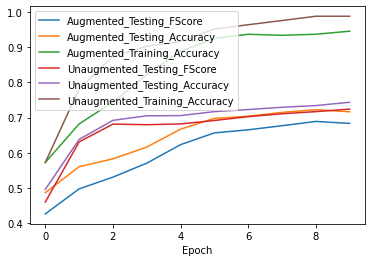

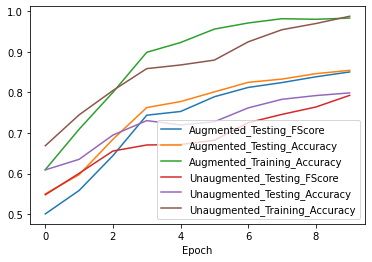

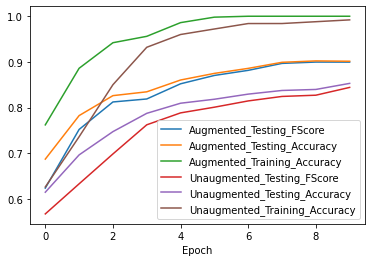

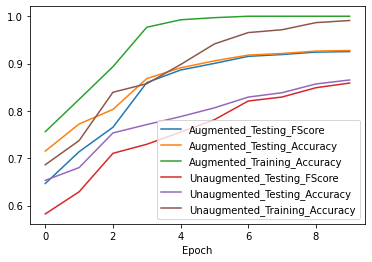

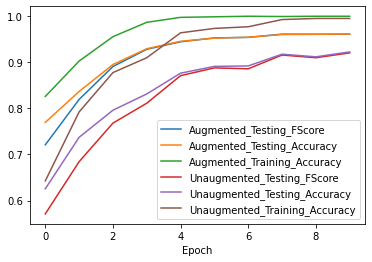

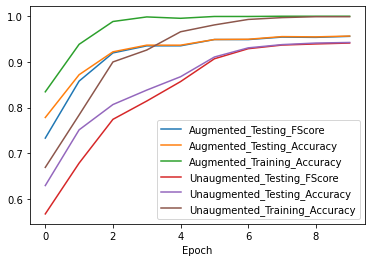

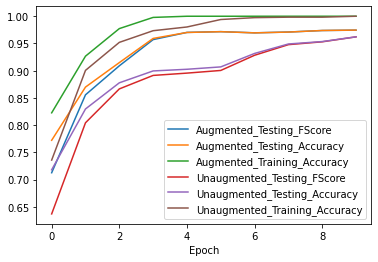

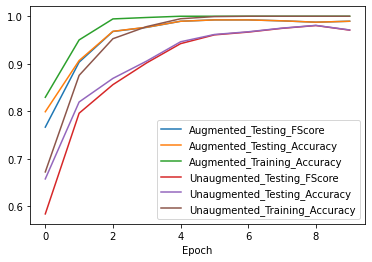

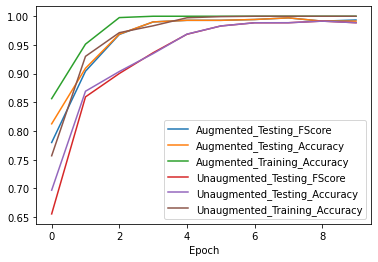

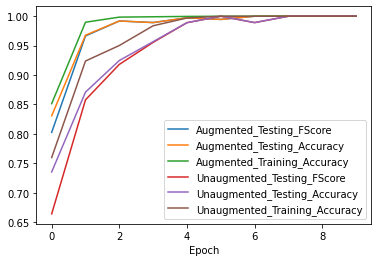

In [ ]:
count = 10
for i in data_df_list:
  figure = i.plot(x ='Epoch', y=['Augmented_Testing_FScore', 'Augmented_Testing_Accuracy', 'Augmented_Training_Accuracy', 'Unaugmented_Testing_FScore', 'Unaugmented_Testing_Accuracy', 'Unaugmented_Training_Accuracy'], kind = 'line')
  # fig = figure.get_figure()
  # fig.savefig("/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/Plots/Plot_" + str(count) + '.jpg')
  count+=10

In [ ]:
df2 = pd.DataFrame(columns = ['Percentage', 'Maximum Augmented Accuracy', 'Maximum Unaugmented Accuracy', 'Augmented Weighted FScore', 'Unaugmented Weighted FScore'])
for index, df in list(enumerate(data_df_list)):
  if (index == 9):
    break
  print(str((index+1)*10) + " Percentage:")
  print(str(df["Augmented_Testing_Accuracy"].iloc[-1]) + ", " + str(df["Unaugmented_Testing_Accuracy"].iloc[-1]))
  df2 = df2.append({
      'Percentage': (index+1)*10,
      'Maximum Augmented Accuracy': round(df["Augmented_Testing_Accuracy"].iloc[-1], 3),
      'Maximum Unaugmented Accuracy': round(df["Unaugmented_Testing_Accuracy"].iloc[-1], 3),
      'Augmented Weighted FScore': round(df['Augmented_Testing_FScore'].iloc[-1], 3),
      'Unaugmented Weighted FScore': round(df['Unaugmented_Testing_FScore'].iloc[-1], 3)
  }, ignore_index = True)

10 Percentage:
0.7164004879553549, 0.7434834123222749
20 Percentage:
0.8546052631578948, 0.7989487516425755
30 Percentage:
0.9014032496307238, 0.8529144415407339
40 Percentage:
0.9276094276094276, 0.8653198653198653
50 Percentage:
0.9613119220290856, 0.9226238440581711
60 Percentage:
0.9566744730679156, 0.9426229508196722
70 Percentage:
0.9745639534883721, 0.9622093023255814
80 Percentage:
0.9894378131447097, 0.9711538461538461
90 Percentage:
0.9914852978941961, 0.9887005649717514


In [ ]:
# df2.to_csv("/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/results.csv")

In [ ]:
df2

,Percentage,Maximum Augmented Accuracy,Maximum Unaugmented Accuracy,Augmented Weighted FScore,Unaugmented Weighted FScore
0,10.0,0.716,0.743,0.683,0.724
1,20.0,0.855,0.799,0.851,0.793
2,30.0,0.901,0.853,0.900,0.844
3,40.0,0.928,0.865,0.925,0.859
4,50.0,0.961,0.923,0.961,0.921
5,60.0,0.957,0.943,0.956,0.941
6,70.0,0.975,0.962,0.974,0.962
7,80.0,0.989,0.971,0.989,0.971
8,90.0,0.991,0.989,0.994,0.989


# Demo

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
model_bottleneck, model_cartoon = get_models()
model_cartoon = load_model("/content/drive/MyDrive/Capstone/anime/animated2/predictor_model")
styles = "shinkai"
key = {0:"anger", 1:"joy", 2:"surprise", 3:"disgust", 4:"fear", 5:"sadness", 6:"neutral"}
clear_output()

In [ ]:
def cartoonize_captured():
  print("PROCESSING....")

  old_stdout = sys.stdout 
  sys.stdout = open(os.devnull, "w")

  !python cartoonize.py \
      --styles {styles} \
      --batch_size 1 \
      --comparison_view horizontal
  
  sys.stdout = old_stdout
  clear_output()

In [ ]:
def process_image():
  photo_col = np.asarray(Image.fromarray(np.asarray(Image.open('photo.jpg'))[:, 80:560]).resize((256, 256)))
  photo = cv2.resize(np.asarray(Image.open('photo.jpg'))[:, 80:560], (256, 256))
 
  new_photo = np.asarray(ImageOps.grayscale(PIL.Image.fromarray(photo)).convert("RGB"))
  new_photo = new_photo[:, :, 1].reshape(256, 256)
  imagePath = sys.argv[1]
 
  faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  faces = faceCascade.detectMultiScale(
          new_photo,
          scaleFactor=1.3,
          minNeighbors=3,
          minSize=(30, 30)
  )
 
  print("Found {} Faces!".format(len(faces)))
  for (x, y, w, h) in faces:
      rect = cv2.rectangle(photo, (x-10, y-10), (x+w+10, y+h+10), (0, 255, 0), 2)
      cv2.rectangle(photo_col, (x-10, y-10), (x+w+10, y+h+10), (0, 255, 0), 2)
 
  crop_photo = cv2.resize(np.asarray(Image.fromarray(photo[y:y+h, x:x+w])), (256, 256))
  crop_photo_col = np.asarray(Image.fromarray(photo_col[y:y+h, x:x+w]).resize((256, 256)))
  gray = np.asarray(ImageOps.grayscale(Image.fromarray(crop_photo)).convert("RGB"))
  gray_col = np.asarray(ImageOps.grayscale(Image.fromarray(crop_photo_col)).convert("RGB"))
  pred_photo = np.expand_dims(gray, axis=0)
  pred_photo_col = np.expand_dims(gray_col, axis=0)
 
  files1 = glob.glob(os.path.join(input_dir, "*"))
  files2 = glob.glob(os.path.join(output_dir,"comparison/*"))
 
  for f in files1:
      os.remove(f)
  for f in files2:
      os.remove(f)
  if (os.path.exists(os.path.join(output_dir, "shinkai"))):
    files3 = glob.glob(os.path.join(output_dir, "shinkai/*"))
    for f in files3:
      os.remove(f)
  
  Image.fromarray(pred_photo_col[0]).save(os.path.join(input_dir, "pred_photo_col.jpg"))
  Image.fromarray(photo_col).save(os.path.join(input_dir, "photo_col.jpg"))
  
  cv2.imwrite(os.path.join(input_dir, "pred_photo.jpg"), pred_photo[0])
  cv2.imwrite(os.path.join(input_dir, "crop_photo.jpg"), crop_photo)
 
  cartoonize_captured()
 
  cartoon_me = np.asarray(ImageOps.grayscale(Image.open(os.path.join(output_dir, "comparison/pred_photo.jpg"))).convert("RGB"))[:, 256:]
  cartoon_me = np.expand_dims(cartoon_me, axis=0)
 
  pred = model_cartoon.predict_classes(model_bottleneck.predict(cartoon_me))
  prob = model_cartoon.predict(model_bottleneck.predict(cartoon_me))
 
  if (prob[0][3]>0.5):
    preder = 3
  else:
    temp = prob[0][3]
    prob[0][3] = 0
    preder = np.argmax(prob[0])
    prob[0][3] = temp
 
  # display(Image.fromarray(photo))
  display(Image.open(os.path.join(output_dir, "comparison/photo_col.jpg")))
  display(ImageOps.grayscale(Image.open(os.path.join(output_dir, "comparison/pred_photo.jpg"))))
  print()
  print("Detected Emotion: " + str(key[preder]))
  print()
  print(prob[0])
  print()

In [ ]:
def run_webcam_demo():
  from IPython.display import Image as imer
  try:
    filename = take_photo()
    print('Saved to {}'.format(filename))
    
    display(imer(filename))
  except Exception as err:

    print(str(err))
  process_image()

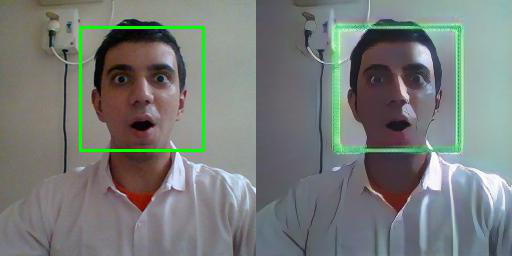

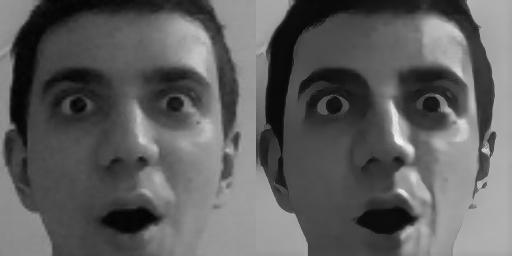


Detected Emotion: surprise

[4.3986406e-02 5.4788683e-04 9.1891575e-01 2.2574026e-02 8.3440002e-03
 4.7800620e-03 8.5189444e-04]



In [ ]:
run_webcam_demo()

In [ ]:
def run_upload_demo():
  uploaded_image = files.upload()
  os.rename(list(uploaded_image.keys())[0], 'photo.jpg')
  clear_output()
  display(Image.open('photo.jpg'))
  process_image()

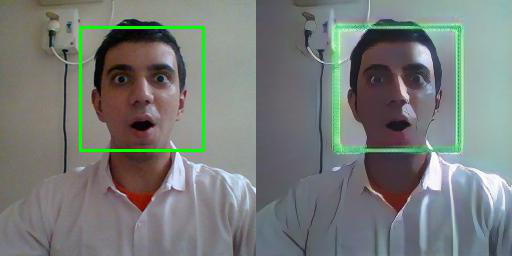

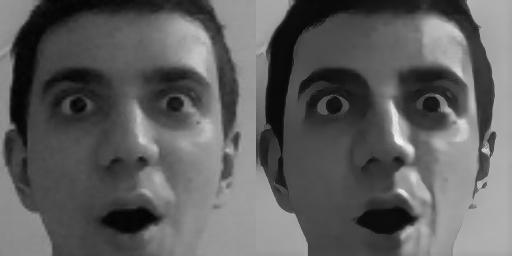


Detected Emotion: surprise

[4.3986406e-02 5.4788683e-04 9.1891575e-01 2.2574026e-02 8.3440002e-03
 4.7800620e-03 8.5189444e-04]



In [ ]:
run_upload_demo()